In [47]:
from annoy import AnnoyIndex
import random
import matplotlib.pyplot as plt

In [48]:
f = 2  # Length of item vector that will be indexed
data = []
seed = random.randint(10**3, 10**8)

for i in range(1000):
        v = [random.gauss(0, 3) for z in range(f)]
        data.append(v)

metrics = ["euclidean", "angular", "dot", "hamming"]

for metric in metrics:
    t = AnnoyIndex(f, metric)
    for i in range(1000):
        t.add_item(i, data[i])
    t.build(10) # 10 trees
    t.save(f"test-{metric}-{seed}.ann")

In [49]:
import numpy as np


numpy_data = np.array(data)

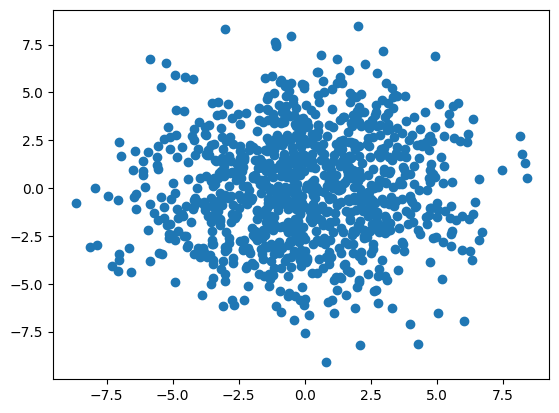

In [50]:
plt.scatter(numpy_data[:,0], numpy_data[:,1])

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(numpy_data)
kmeans.labels_

array([4, 1, 4, 4, 1, 0, 5, 1, 4, 3, 5, 4, 4, 1, 4, 2, 0, 4, 1, 1, 4, 1,
       3, 0, 0, 4, 0, 4, 0, 4, 1, 4, 2, 5, 0, 0, 3, 2, 5, 3, 0, 5, 4, 5,
       0, 5, 2, 4, 2, 3, 1, 2, 5, 5, 3, 4, 2, 4, 3, 4, 2, 4, 2, 5, 5, 2,
       3, 5, 1, 4, 2, 2, 1, 2, 3, 0, 0, 1, 5, 0, 5, 0, 3, 1, 4, 3, 4, 4,
       1, 4, 4, 0, 4, 4, 5, 0, 5, 4, 2, 4, 0, 4, 4, 0, 1, 5, 1, 4, 5, 5,
       1, 0, 1, 1, 4, 3, 1, 4, 5, 1, 2, 5, 4, 0, 2, 4, 5, 4, 4, 0, 0, 5,
       4, 5, 5, 1, 1, 2, 0, 3, 2, 2, 1, 4, 2, 3, 3, 0, 2, 1, 3, 0, 5, 5,
       1, 5, 4, 0, 0, 5, 4, 0, 0, 1, 5, 3, 4, 1, 3, 4, 4, 0, 4, 1, 1, 0,
       1, 4, 3, 4, 3, 4, 3, 4, 2, 1, 2, 4, 2, 2, 3, 4, 4, 4, 2, 5, 4, 1,
       0, 3, 3, 3, 1, 2, 3, 0, 2, 5, 0, 0, 5, 1, 1, 2, 3, 2, 3, 4, 1, 2,
       4, 4, 1, 1, 0, 1, 5, 4, 4, 2, 4, 1, 4, 0, 5, 3, 2, 4, 0, 2, 4, 3,
       2, 4, 2, 2, 0, 0, 2, 0, 2, 2, 4, 3, 2, 4, 2, 4, 0, 1, 2, 5, 5, 5,
       1, 2, 0, 5, 3, 4, 4, 0, 3, 2, 1, 5, 5, 0, 2, 3, 1, 1, 3, 0, 1, 5,
       5, 1, 5, 0, 4, 1, 1, 5, 4, 2, 4, 4, 5, 1, 0,

In [52]:
colors = ["red", "green", "blue", "purple", "yellow", "pink"]

#for index, entry in enumerate(numpy_data):
#    plt.scatter(entry[0], entry[1], c=colors[kmeans.labels_[index]])

In [53]:
list(map(lambda index: colors[index], kmeans.predict([[-7.5, -7.5], [0, 7.5], [7.5, 0]])))

['purple', 'blue', 'pink']

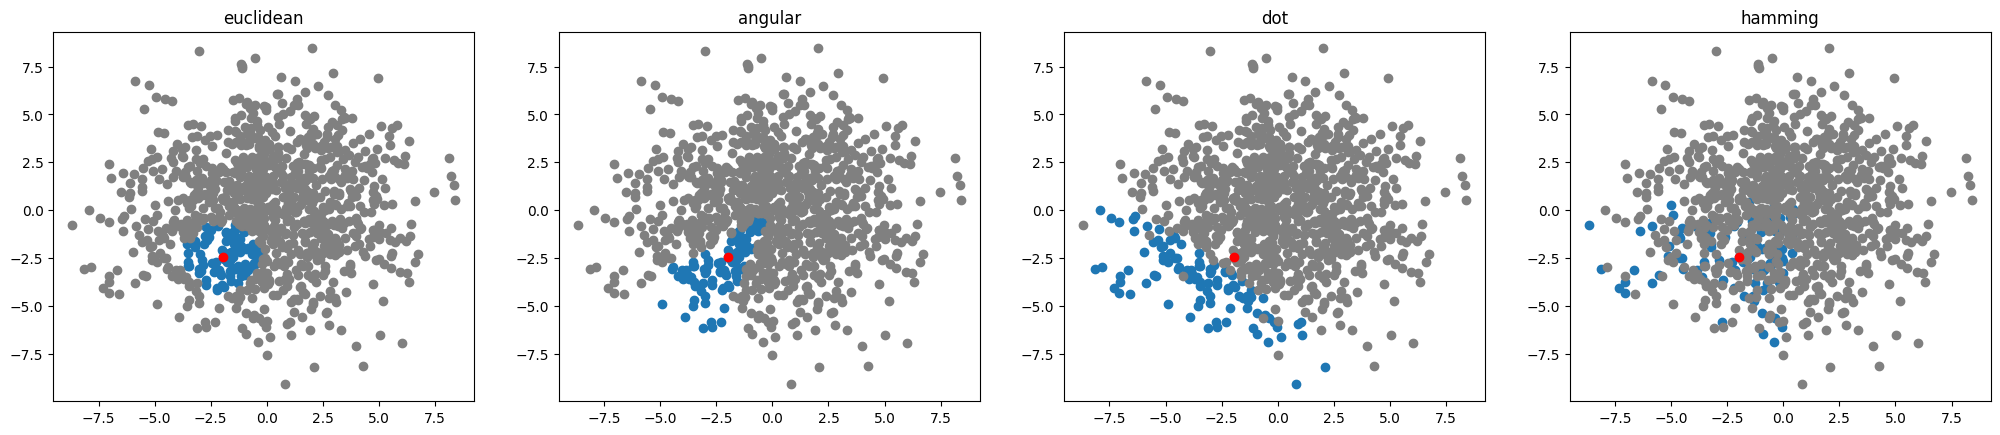

In [59]:
sample = 4

fig, axs = plt.subplots(1, len(metrics))

fig.set_figwidth(25)

for index, metric in enumerate(metrics):
    u = AnnoyIndex(f, metric)
    u.load(f"test-{metric}-{seed}.ann") # super fast, will just mmap the file
    neighbor_indices = u.get_nns_by_item(sample, 100)

    neighbors = np.array(list(map(lambda index_: numpy_data[index_], u.get_nns_by_item(sample, 100))))

    axs[index].set_title(metric)
    axs[index].scatter(neighbors[:,0], neighbors[:,1])

    indices = set(range(1000)).difference(neighbor_indices)
    filtered_data = np.array([data[index_] for index_ in indices])
    axs[index].scatter(filtered_data[:,0], filtered_data[:,1], c="gray")

    axs[index].scatter(numpy_data[sample,0], numpy_data[sample,1], c="red")